# Cyber Foundation Model Training and Inference Notebook

## Table of Contents
* Introduction
* Dataset and Preprocessing
* Training
* Inference
* Use Cases
* Additional Use Cases
* Conclusion
* References


## Introduction

General-purpose large language models (LLMs) are helpful in many fields, but specialized domains often need bespoke models. General-purpose LLMs struggle to generate a large amount of realistic synthetic logs, especially with raw logs that differ significantly from natural language. Traditional LLMs need more specificity to handle the structured format of machine-generated logs like JSON. 
Using general models for generating synthetic logs can miss unique patterns and complexities, reducing the effectiveness of cybersecurity training and simulations. Specialized cyber language models trained on raw logs can better capture these intricacies, improving the precision and effectiveness of cybersecurity measures. The fields may differ for each setting, even if they are of the same log type. 

Our research focuses on the benefits of using such specialized models to enhance cybersecurity efforts.

In this notebook, the primary goal is to train a GPT model from scratch from raw logs and to generate synthetic logs. Users can expand this use case for various downstream tasks, such as those in the Use Cases and Additional Use Cases sections.



## Dataset and Preprocessing

In this notebook, we use a synthetic dataset of 3239 Azure Active Directory logs with activities of 20 accounts in `JSON` format for demonstration purposes. 
Azure Active Directory (Azure AD) logs are used for monitoring and managing the security, health, and performance of Azure AD environment. 
The associated scripts are taken from this [repo](https://github.com/karpathy/nanoGPT). We chose this repo because it has very few dependencies and allows us to easily change the model size and hyperparameters.


In the preprocessing script, raw logs are converted to `jsonlines` format to train the model effectively on the specifics of cyber logs, and meta files are generated for the training. The `jsonlines` format enabled the model to generate logs with line breaks, which makes using the generated logs easier. The preprocessing script is from the same [repo](https://github.com/karpathy/nanoGPT).

In [1]:
!python prepare.py

all the unique characters: 
 "#&'(),-./0123456789:;@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyz{}
vocab size: 82
train has 8,269,491 tokens
val has 918,833 tokens


An example record from the dataset:

```json
{"time": "2022-08-01T00:19:37.909827Z", "resourceId": "/tenants/d3e5a967-5657-4a42-afcc-6106b6c3c299/providers/Microsoft.aadiam", "operationName": "Sign-in activity", "operationVersion": "1.0", "category": "SignInLogs", "tenantId": "d3e5a967-5657-4a42-afcc-6106b6c3c299", "resultType": "0", "resultSignature": "None", "durationMs": 0, "callerIpAddress": "99.116.100.205", "correlationId": "7641103c-1db3-4e14-9ebc-6a9555ba02b2", "identity": "Aaron Cole", "Level": 4, "location": "XD", "properties": {"id": "c98bb980-53fe-43a8-afd2-72b917706b00", "createdDateTime": "2022-08-01T00:19:38.009827Z", "userDisplayName": "Aaron Cole", "userPrincipalName": "acole@domain.com", "userId": "5d557969-1645-4ba4-be83-b6fd943659f7", "appId": "e47a1d38-5f61-45cd-b1b9-bc92f525c598", "appDisplayName": "Altoura", "ipAddress": "99.116.100.205", "status": {"errorCode": 0}, "clientAppUsed": "Browser", "userAgent": "Mozilla/5.0 (Linux; Android 2.3.5) AppleWebKit/532.2 (KHTML, like Gecko) Chrome/46.0.898.0 Safari/532.2 Edge/105.19198", "deviceDetail": {"deviceId": "", "operatingSystem": "Windows 10", "browser": "Edge 105.19198"}, "location": {"city": "Carrollstad", "state": "Norrisbury", "countryOrRegion": "XD", "geoCoordinates": {"latitude": -38.8540465, "longitude": -17.674718}}, "correlationId": "690fb113-a50a-46bc-b5ca-90b2c6988d8a", "conditionalAccessStatus": "success", "appliedConditionalAccessPolicies": [], "authenticationContextClassReferences": [], "originalRequestId": "84920ffc-d938-4eb7-97ac-3f2769d09bba", "isInteractive": true, "tokenIssuerName": "", "tokenIssuerType": "AzureAD", "authenticationProcessingDetails": [], "networkLocationDetails": [], "clientCredentialType": "none", "processingTimeInMilliseconds": 100, "riskDetail": "none", "riskLevelAggregated": "none", "riskLevelDuringSignIn": "none", "riskState": "none", "riskEventTypes": [], "riskEventTypes_v2": [], "resourceDisplayName": "Altoura Online", "resourceId": "f0630e90-b752-4960-bfb9-a0794fc34930", "resourceTenantId": "d3e5a967-5657-4a42-afcc-6106b6c3c299", "homeTenantId": "d3e5a967-5657-4a42-afcc-6106b6c3c299", "authenticationDetails": [], "authenticationRequirementPolicies": [], "authenticationRequirement": "singleFactorAuthentication", "servicePrincipalId": "", "userType": "Member", "flaggedForReview": false, "isTenantRestricted": false, "autonomousSystemNumber": 214655, "crossTenantAccessType": "none", "privateLinkDetails": {}, "ssoExtensionVersion": "", "uniqueTokenIdentifier": "JmqXv1yjmpLCVKYQkwoaQn0ibst82O1aYzAfql41BAoBA52Q", "incomingTokenType": "none", "authenticationProtocol": "none", "appServicePrincipalId": null, "resourceServicePrincipalId": "1f37c851-4be4-455b-928a-fbde7845a68a", "rngcStatus": 0}}



## Training

The following script trains a GPT model from scratch. 
We found that the following network size and parameters gave us optimum results for the synthetic training data  

`number of layers: 12`

`number of heads: 12`

`embedding size: 768`

`batch size:12`

`number of iterations: 1000`

The loss gets small enough in ~60 minutes after 1500 iterations on a single A100 GPU. 
Model size and hyperparameters can be tuned in the script as needed.  
The training script is taken from the same [repo](https://github.com/karpathy/nanoGPT/blob/master/train.py).


In [2]:
!python train.py

tokens per iteration will be: 491,520
found vocab_size = 82 (inside ../model/meta.pkl)
Initializing a new model from scratch
number of parameters: 85.02M
num decayed parameter tensors: 50, with 86,570,496 parameters
num non-decayed parameter tensors: 25, with 19,200 parameters
using fused AdamW: True
compiling the model... (takes a ~minute)
step 0: train loss 4.5298, val loss 4.5273
iter 0: loss 4.5249, time 35414.23ms, mfu -100.00%
iter 1: loss 4.5400, time 4330.66ms, mfu -100.00%
iter 2: loss 4.4993, time 4434.51ms, mfu -100.00%
iter 3: loss 4.4159, time 4442.14ms, mfu -100.00%
iter 4: loss 4.3106, time 4442.15ms, mfu -100.00%
iter 5: loss 4.1842, time 4444.32ms, mfu 26.11%
iter 6: loss 4.0527, time 4448.13ms, mfu 26.11%
iter 7: loss 3.9426, time 4446.19ms, mfu 26.11%
iter 8: loss 3.8509, time 4448.20ms, mfu 26.11%
iter 9: loss 3.7817, time 4444.63ms, mfu 26.11%
iter 10: loss 3.6997, time 4444.03ms, mfu 26.11%
iter 11: loss 3.6304, time 4449.75ms, mfu 26.10%
iter 12: loss 3.5853, tim

In our experiments with real logs, we observed the following training times on a single GPU. This table shows that a model trained with a single GPU can generate realistic synthetic logs. 

| # of Layers | # of Heads | Context Size | GPT Size (M) | Tokenizer | Dataset Description | Dataset Length ~ (characters) | Training Time A100 GPU |
|-------------|------------|--------------|----------|-----------|---------------------|-------------------------------|------------------------|
| 12          | 12         | 7000         | 120    | Character | Azure Logs          | 39,000,000                    | ~45 minutes            |
| 6           | 6          | 4000         | 85.2   | Character | Azure Logs          | 39,000,000                    | ~15 minutes            |
| 12          | 12         | 7000         | 120    | Character | Sharepoint Logs     | 4,700,000                     | ~15 minutes            |



## Inference

The model trained above will be used below to generate synthetic logs. Because this is a base model, we will prompt the model with the first key of the log. And the rest of the logs get completed. The sampling script is taken from [here](https://github.com/karpathy/nanoGPT/blob/master/sample.py)

In [3]:
!python sample.py '{"time": '

number of parameters: 85.02M
{"time": "2022-08-10T19:01:28.686657Z", "resourceId": "/tenants/d3e5a967-5657-4a42-afcc-6106b6c3c299/providers/Microsoft.aadiam", "operationName": "Sign-in activity", "operationVersion": "1.0", "category": "NonInteractiveUserSignInLogs", "tenantId": "d3e5a967-5657-4a42-afcc-6106b6c3c299", "resultType": "0", "resultSignature": "None", "durationMs": 0, "callerIpAddress": "205.33.24.92", "correlationId": "a9d17a5-ea46-454c-83b8-a0202c8990", "identity": "Vanessa Ramirez", "Level": 4, "location": "XD", "properties": {"id": "91522b-879-4460-9d5-824599d00", "createdDateTime": "208-19T19:01:08.56656Z", "userDisplayName": "Vanessa Ramirez", "userPrincipalName": "vramirez@domain.com", "userId": "5d72b7ed-62ea-4b94-b931-ccef65d71ebd", "appId": "2eae4ad1-8cae-48fe-b718-76bd66e2fc7f", "appDisplayName": "Altoura", "ipAddress": "205.33.24.92", "status": {"errorCode": 0}, "clientAppUsed": "Browser", "userAgent": "Mozilla/5.0 (X11; Linux i686) AppleWebKit/536.2 (KHTML, like

Once prompted with the beginning of the code, the pre-trained model completes the rest of the logs. The generated logs above may have hallucinations in some fields because we used a small set of synthetic logs for training.

The sampling script has a small maximum token limit to make the notebook run faster for demonstration purposes. After each iteration, generation stops when the limit is reached, causing an incomplete log in each iteration. Such incomplete or non-intact logs should be removed with post-processing before using them for downstream tasks. Users may want to increase the temperature parameter in the sample script for increased diversity.


## Use Cases

In the previous section, we demonstrated that the model can generate realistic synthetic logs. Here, we explore several downstream use cases where these models can enhance cybersecurity efforts and improve overall system resilience.

### Generating realistic training data: 
A model trained with propriety data can generate realistic logs true to the setting and incorporate them into future model retraining cycles, helping reduce false positives. 

For example, users can extend the prompt to generate logs from around a specific day, i.e. if logs from 2022-08-08 are needed, the prompt can be `{"time": "2022-08-08`. The completed logs with this prompt should be from that day.

In [1]:
!python sample.py '{"time": "2022-08-08'

number of parameters: 85.02M
{"time": "2022-08-08T13:02:25.052940Z", "userDisplayName": "Thomas Price", "userPrincipalName": "tprice@domain.com", "userId": "32109e2-ee4f-4d11-9c38-2556aec0f2b5", "appId": "9a7e67c7-6f05-42a3-b226-97c7ec3e9696", "appDisplayName": "Adobe Identity Management", "ipAddress": "166.105.218.218.215", "status": {"errorCode": 50158fa8f-8c3f-4bbd-9bc9-6d23-15623cff4ac56", "appId": "916"9atoilDe2ctivis Sync", "ipAddress": "16.166.11.181.213", "status": {"errorCode": 50158, "failureReason": "External security challenge was not satisfied."}, "clientAppUsed": "Mobile Apps and Desktop clients", "userAgent": "Mozilla/5.0 (X11; Linux i686) AppleWebKit/535.2 (KHTML, like Gecko) Chrome/2.0.843.0 Safari/535.2 Edge/118.12158", "deviceDetail": {"deviceId": "3581988-abdc-47e0-b28-519-8672d26d31f8e", "displayName": "THOMASPRICE-LT", "operatingSystem": "Windows 10", "browser": "Edge 118.12158", "trustType": "Hybrid Azure AD joined"}, "location": {"city": "Santosborough", "state"

You can see that most of the generated logs are from a specific day. As before, incomplete logs or logs with another date could be filtered with post-processing.

In our experiments with real logs, 90% of the generated logs were correctly formatted as JSON and could be parsed.

Because our demo dataset is small, the diversity of the generated logs may be low and close to the training data. The generated logs will have more diversity and better distribution with larger datasets.


In our experiments with real logs, we measured the similarity between training and generated logs to verify the diversity of the logs. We used Cosine similarity and Rouge 1 metrics.

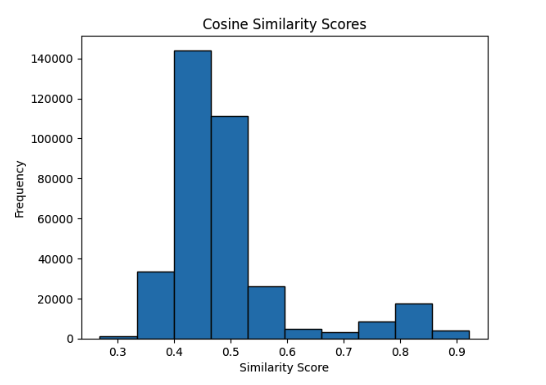

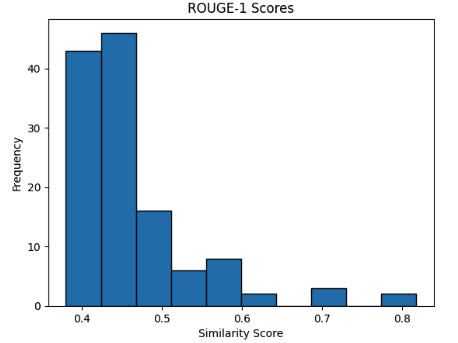

In [15]:
from IPython.display import Image, display
display(Image(filename='./cosine_similarity.png', width=600))
display(Image(filename='./Rouge1.png', width=600))

### Generating logs from a specific user:
To achieve this, we can add usernames as a prefix to each log and train a model using the new data:

In [5]:
import json
import os
import pickle
import numpy as np

def get_username_prefix(json_obj):
    try:
        user_principal_name = json_obj['properties']['userPrincipalName']
        return user_principal_name.split('@')[0]
    except (KeyError, IndexError):
        return 'unknown'

with open('../dataset/azure-ad-logs-sample-training-data.json', 'r') as file:
    data = json.load(file)

prefixed_json_strings = []
for dictionary in data:
    prefix = get_username_prefix(dictionary)
    json_string = json.dumps(dictionary)
    prefixed_json_strings.append(f"{prefix} {json_string}")

combined_json_string = '\n'.join(prefixed_json_strings)


with open('../dataset/prefixed_azure_ad_logs.txt', 'w') as output_file:
    output_file.write(combined_json_string)

We create new meta files with the prepare script for the new dataset.

In [9]:
!python prepare-prefix.py

all the unique characters: 
 "#&'(),-./0123456789:;@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyz{}
vocab size: 82
train has 8,294,119 tokens
val has 921,569 tokens


We run training with the new dataset, in which we added the usernames to each line as a prefix.

In [13]:
!python train-prefix.py

tokens per iteration will be: 491,520
found vocab_size = 82 (inside ../model/meta-prefix.pkl)
Initializing a new model from scratch
number of parameters: 85.02M
num decayed parameter tensors: 50, with 86,570,496 parameters
num non-decayed parameter tensors: 25, with 19,200 parameters
using fused AdamW: True
compiling the model... (takes a ~minute)
step 0: train loss 4.5268, val loss 4.5277
iter 0: loss 4.5325, time 36328.39ms, mfu -100.00%
iter 1: loss 4.5260, time 4348.98ms, mfu -100.00%
iter 2: loss 4.4908, time 4445.12ms, mfu -100.00%
iter 3: loss 4.4106, time 4445.56ms, mfu -100.00%
iter 4: loss 4.3005, time 4448.25ms, mfu -100.00%
iter 5: loss 4.1820, time 4447.32ms, mfu 26.09%
iter 6: loss 4.0607, time 4445.90ms, mfu 26.09%
iter 7: loss 3.9452, time 4450.24ms, mfu 26.09%
iter 8: loss 3.8415, time 4456.01ms, mfu 26.09%
iter 9: loss 3.7682, time 4454.60ms, mfu 26.08%
iter 10: loss 3.6929, time 4445.29ms, mfu 26.09%
iter 11: loss 3.6415, time 4441.10ms, mfu 26.09%
iter 12: loss 3.58

This model should be able to complete the rest of the logs when prompted with a specific username/prefix.

In [9]:
!python sample-username.py 'cperry '


number of parameters: 85.02M
cperry {}, "clientAppUsed": "Mobile Apps and Desktop clients", "userAgent": "Mozilla/5.0 (iPad; CPU iPad OS 9_3_6 like Mac OS X) AppleWebKit/536.1 (KHTML, like Gecko) CriOS/42.0.865.0 Mobile/77O124 Safari/536.1 Edge/99.14477", "deviceDetail": {"deviceId": "a44625dc-6f81-449a-979805f7209b42", "displayName": "ATTACKTARGET-LT", "operatingSystem": "Windows 10", "browser": "Edge 99.14477", "trustType": "Azure AD registered"}, "location": {"city": "Smithfort", "state": "Smithfort", "countryOrRegion": "XR", "geoCoordinates": {"latitude": 3.7564095, "longitude": -121.574606}}, "correlationId": "e394954-4-4-a0-9cda59e", "conditionalAccessStatus": "success", "appliedConditionalAccessPolicies": [], "authenticationContextClassReferences": [], "originalRequestId": "c0e50881-b8-40-88-215f611", "isInteractive": false, "tokenIssuerName": "", "tokenIssuerType": "AzureAD", "authenticationProcessingDetails": [], "networkLocationDetails": [], "processingTimeInMilliseconds": 12

Because the training data is very small, not all logs are properly formatted. In our experiments with real logs, more than 70% of the logs had the correct usernames, and 90% of them had the correct format.

In our experiments with real logs, we observed limitations in the distribution of unique categorical values. The figures below show the differences between training and generated logs. 

Distribution of browsers in the training logs:


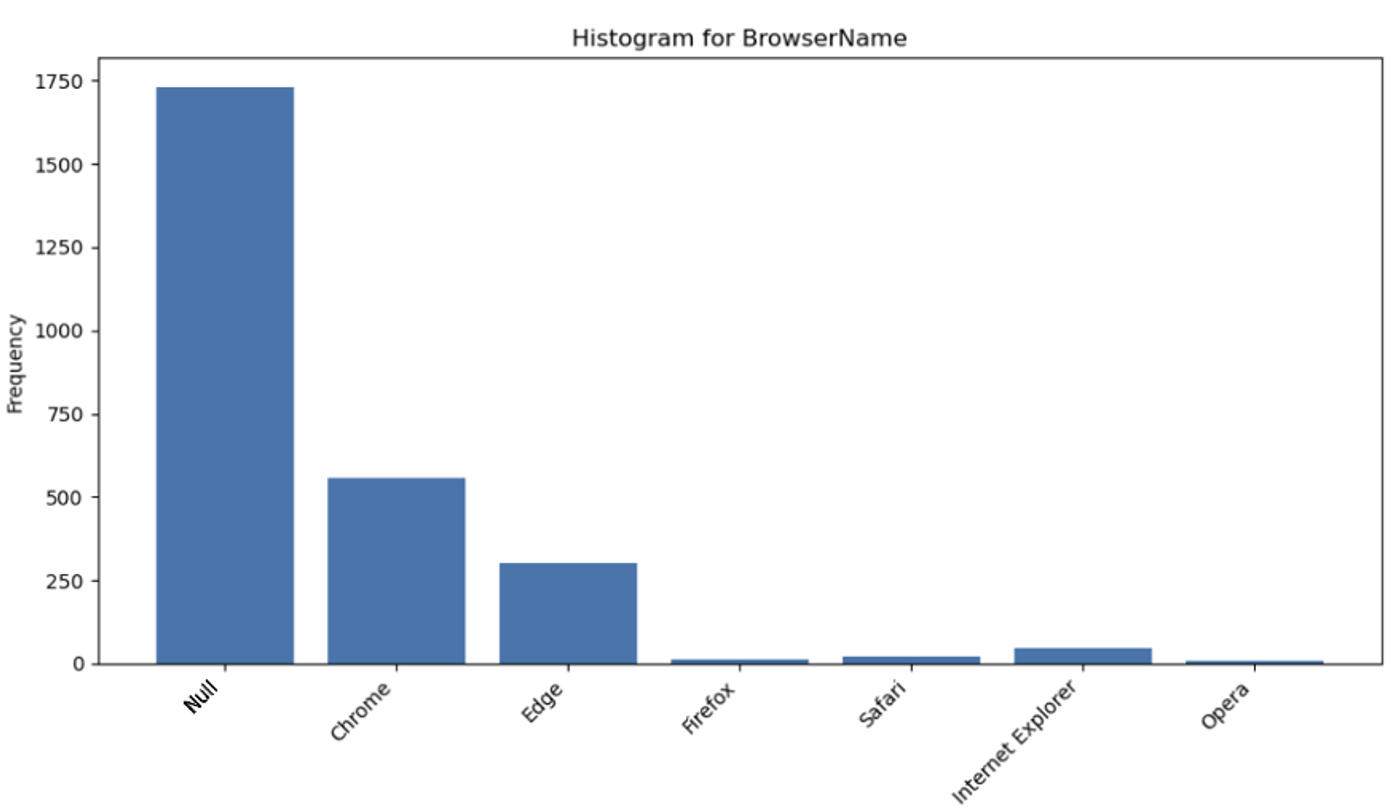

Distribution of browsers in the generated logs:


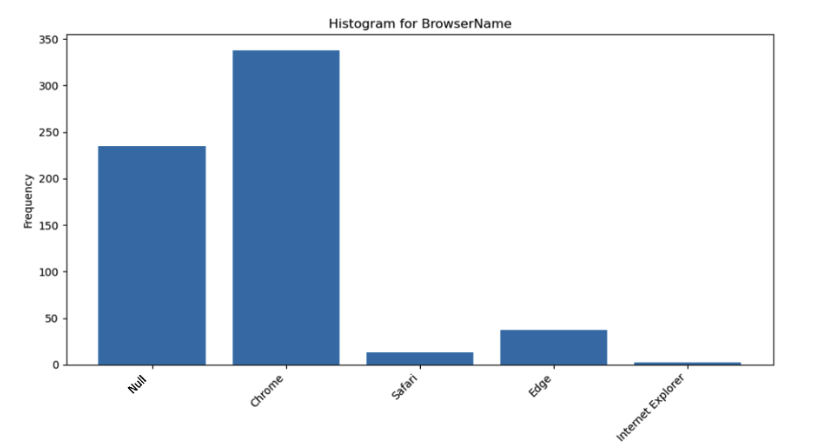

In [17]:
from IPython.display import Image, display

print("Distribution of browsers in the training logs:")
display(Image(filename='./Browser_training.png', width=600))
print("Distribution of browsers in the generated logs:")
display(Image(filename='./Browser_generated.png', width=600))



As the figures above show, rare values are omitted, and NULL values are not adequately represented in the synthetic logs. Increasing the model size or adjusting the generation temperature may help address this issue in future experiments.


## Additional Use Cases

Future work will focus on advancing the generation of synthetic logs to test and improve security alert systems. Initial experiments have demonstrated the feasibility of using Cyber GPT models to create realistic logs, with 90% of generated logs successfully triggering existing alerts and affirming their authenticity.

Building on this, future research will aim to:

- Generate logs that simulate red team activities, using GPT models to mimic cyberattack traces rather than writing code, thereby enhancing detection and response strategies.

- Train GPT models with logs from various incidents, tagging each entry with MITRE framework sub-technique IDs to assess the model's ability to produce relevant logs based on specific prompts.

- Expand the dataset to include logs from multiple incidents, providing a diverse range of scenarios for security teams to evaluate and improve their capabilities.

This work will contribute to a robust platform for simulating breaches, ultimately enhancing the preparedness and resilience of security teams and leading to a more secure enterprise.

## Conclusion 

Our research reveals that general-purpose language models fail to generate large amounts of raw cybersecurity logs that could be used for downstream tasks. We propose cyber foundation models designed to generate large domain-specific data, improving anomaly detection, threat simulation, and overall security.
While smaller models were tested, larger models trained with more data may show greater adaptability. 
We used synthetic data for this notebook and showed that even a small model can learn from raw data and generate realistic logs.
Training models with your own logs offers specialized and broader applications. Cyber foundation models strengthen and adapt cybersecurity defenses.

## References

* https://github.com/karpathy/nanoGPT